In [266]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
import autosklearn.classification as auto_c
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [267]:
df = pd.read_csv('cleaned_glass.csv')

In [268]:
numeric = df.select_dtypes(include=np.number).columns.to_list()
numeric.remove('index')
numeric.remove('Type')

x = df[numeric]
y = df['Type']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [269]:
# # Pipeline ordinal variables
# ordinal_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OrdinalEncoder())
# ])

# # Pipeline nominal variables
# nominal_pipeline = Pipeline([
#     ('imputer', SimpleImputer(strategy='most_frequent')),
#     ('encoder', OneHotEncoder(sparse=True, handle_unknown='ignore'))
# ])

# Pipeline numeric variables
numeric_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('encoder', StandardScaler())
])

preprocessing_pipeline = ColumnTransformer([
    #('nominal_preprocessor', nominal_pipeline, nominal),
    #('ordinal_preprocessor', ordinal_pipeline, ordinal),
    ('numeric_preprocessor', numeric_pipeline, numeric)
])


In [270]:
# Create model
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini', bootstrap=True, max_depth=None, min_impurity_decrease=0,
                            min_samples_leaf=1, max_leaf_nodes=None, min_samples_split=2, min_weight_fraction_leaf=0,
                            max_features=0.5, n_estimators=512, n_jobs=1,
                            random_state=1, warm_start=True)
complete_pipeline_rf = Pipeline([
    ('preprocessor', preprocessing_pipeline),
    ('estimator', rf)
])

<h4 align="center">Arbol de decision 🕵️​ </h4>

In [271]:
complete_pipeline_rf.fit(x_train, y_train)
y_pred_rf = complete_pipeline_rf.predict(x_test)
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           1       0.80      0.84      0.82        19
           2       0.69      0.75      0.72        12
           3       0.50      0.17      0.25         6
           5       1.00      1.00      1.00         1
           6       0.50      1.00      0.67         1
           7       0.80      1.00      0.89         4

    accuracy                           0.74        43
   macro avg       0.72      0.79      0.72        43
weighted avg       0.73      0.74      0.72        43



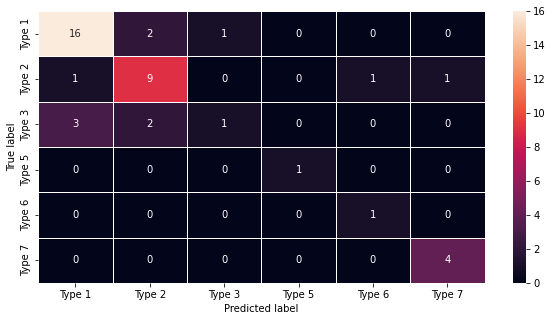

In [272]:
cm = confusion_matrix(y_test, y_pred_rf)
cm_df = pd.DataFrame(cm,
                    index=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'],
                    columns=['Type 1','Type 2','Type 3','Type 5','Type 6','Type 7'])

plt.figure(figsize=(10,5))
sns.heatmap(cm_df, annot=True, linewidths=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()